In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [238]:
# Read the XLSX file
data = pd.read_csv("movies_tous.csv")

In [239]:
data.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,titre_original,nationalités,langue_d_origine,type_film,annee_production,budget,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description
0,C’est mon homme,05/04/2023,NaN,87.0,Guillaume Bureau,Bac Films,"Leïla Bekhti,Karim Leklou,Louise Bourgoin",NaN,",F,r,a,n,c,e",Français,Long-métrage,2023,-,42 289 entrées,"3,1","2,7",13 articles de presse,NaN,Julien Delaunay a disparu sur un champ de bata...
1,Une histoire d'amour et de désir,01/09/2021,Romance,102.0,Leyla Bouzid,Pyramide Distribution,"Sami Outalbali,Zbeida Belhajamor,Diong-Keba Tacu",NaN,",F,r,a,n,c,e","Français, Arabe",Long-métrage,2021,"2,6 M€",38 765 entrées,"4,0","3,8",25 articles de presse,1 prix et 9 nominations,"Ahmed, 18 ans, est français d’origine algérien..."
2,Les Bad Guys,06/04/2022,"Comédie,Aventure,Famille",100.0,Pierre Perifel,Universal Pictures International France,"Pierre Niney,Sam Rockwell,Igor Gotesman",The Bad Guys,",U,.,S,.,A,.",Anglais,Long-métrage,2022,-,1 086 350 entrées,"3,6","3,9",151 Critiques Spectateurs,NaN,"LES BAD GUYS, la nouvelle comédie d’aventures ..."
3,La Baleine et l'escargote,21/10/2020,Famille,40.0,Max Lang,Les Films du Préau,"Colette Sodoyez,Diana Rigg,Maia Baran",The Snail and The Whale,",G,r,a,n,d,e,-,B,r,e,t,a,g,n,e",Anglais,Long-métrage,2020,-,140 048 entrées,"3,8","3,7",10 Critiques Spectateurs,NaN,NaN
4,Les Visiteurs,27/01/1993,NaN,105.0,Jean-Marie Poiré,Gaumont Buena Vista International (GBVI),"Jean Reno,Christian Clavier,Valérie Lemercier",NaN,",F,r,a,n,c,e",Français,Long-métrage,1993,-,NaN,"3,2","3,8",5 articles de presse,1 prix et 7 nominations,"En l'an de grace 1123, le comte de Montmirail ..."


In [240]:
data.shape

(7141, 19)

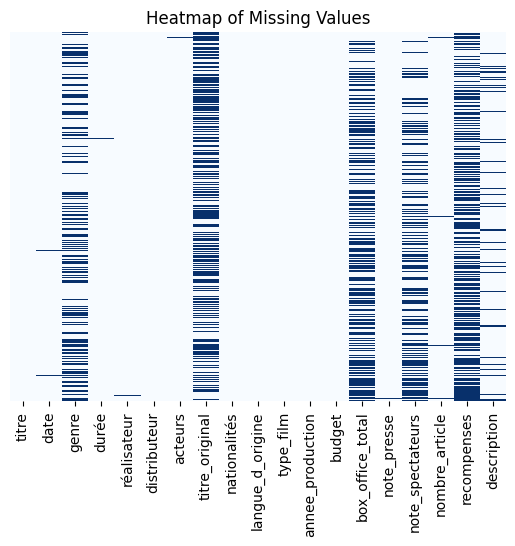

In [241]:


# Create a figure and axes for the plot
fig, ax = plt.subplots()
sns.heatmap(data.isnull(), ax=ax, yticklabels=False, cbar=False, cmap="Blues")
ax.set_title("Heatmap of Missing Values")
plt.show()



In [242]:
data.isnull().sum()

titre                  0
date                  26
genre               2457
durée                 36
réalisateur           12
distributeur           0
acteurs               29
titre_original      4025
nationalités           3
langue_d_origine       0
type_film              0
annee_production       0
budget                 0
box_office_total    3371
note_presse           14
note_spectateurs    2516
nombre_article       101
recompenses         4280
description          653
dtype: int64


nationalités        215


In [243]:
data.head(12)

,titre,date,genre,durée,réalisateur,distributeur,acteurs,titre_original,nationalités,langue_d_origine,type_film,annee_production,budget,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description
0,C’est mon homme,05/04/2023,NaN,87.0,Guillaume Bureau,Bac Films,"Leïla Bekhti,Karim Leklou,Louise Bourgoin",NaN,",F,r,a,n,c,e",Français,Long-métrage,2023,-,42 289 entrées,"3,1","2,7",13 articles de presse,NaN,Julien Delaunay a disparu sur un champ de bata...
1,Une histoire d'amour et de désir,01/09/2021,Romance,102.0,Leyla Bouzid,Pyramide Distribution,"Sami Outalbali,Zbeida Belhajamor,Diong-Keba Tacu",NaN,",F,r,a,n,c,e","Français, Arabe",Long-métrage,2021,"2,6 M€",38 765 entrées,"4,0","3,8",25 articles de presse,1 prix et 9 nominations,"Ahmed, 18 ans, est français d’origine algérien..."
2,Les Bad Guys,06/04/2022,"Comédie,Aventure,Famille",100.0,Pierre Perifel,Universal Pictures International France,"Pierre Niney,Sam Rockwell,Igor Gotesman",The Bad Guys,",U,.,S,.,A,.",Anglais,Long-métrage,2022,-,1 086 350 entrées,"3,6","3,9",151 Critiques Spectateurs,NaN,"LES BAD GUYS, la nouvelle comédie d’aventures ..."
3,La Baleine et l'escargote,21/10/2020,Famille,40.0,Max Lang,Les Films du Préau,"Colette Sodoyez,Diana Rigg,Maia Baran",The Snail and The Whale,",G,r,a,n,d,e,-,B,r,e,t,a,g,n,e",Anglais,Long-métrage,2020,-,140 048 entrées,"3,8","3,7",10 Critiques Spectateurs,NaN,NaN
4,Les Visiteurs,27/01/1993,NaN,105.0,Jean-Marie Poiré,Gaumont Buena Vista International (GBVI),"Jean Reno,Christian Clavier,Valérie Lemercier",NaN,",F,r,a,n,c,e",Français,Long-métrage,1993,-,NaN,"3,2","3,8",5 articles de presse,1 prix et 7 nominations,"En l'an de grace 1123, le comte de Montmirail ..."
5,Sick Of Myself,31/05/2023,NaN,97.0,Kristoffer Borgli,Tandem,"Kristine Kujath Thorp,Eirik Sæther,Fanny Vaager",NaN,",N,o,r,v,è,g,e",Norvégien,Long-métrage,2022,-,30 231 entrées,"3,4","3,4",18 articles de presse,6 nominations,Signe vit dans l’ombre de son petit ami Thomas...
6,Vaincre ou mourir,25/01/2023,Action,100.0,Vincent Mottez,Saje Distribution,"Hugo Becker,Rod Paradot,Gilles Cohen",NaN,",F,r,a,n,c,e",Français,Long-métrage,2022,-,287 578 entrées,"1,3","3,8",10 articles de presse,NaN,"1793. Voilà trois ans que Charette, ancien off..."
7,Uncharted,16/02/2022,Action,116.0,Ruben Fleischer,Sony Pictures Releasing France,"Tom Holland,Mark Wahlberg,Sophia Ali",NaN,",U,.,S,.,A,.",Anglais,Long-métrage,2022,-,2 500 194 entrées,"2,6","3,3",23 articles de presse,NaN,"Nathan Drake, voleur astucieux et intrépide, e..."
8,Erreur de la banque en votre faveur,08/04/2009,NaN,98.0,Michel Munz,Wild Bunch Distribution,"Gérard Lanvin,Jean-Pierre Darroussin,Barbara S...",NaN,",F,r,a,n,c,e",Français,Long-métrage,2008,-,625 167 entrées,"3,1","2,9",21 articles de presse,3 nominations,"Lorsque Julien Foucault, maître d'hôtel de la ..."
9,Air,12/05/2023,NaN,112.0,Ben Affleck,-,"Matt Damon,Viola Davis,Ben Affleck",NaN,",U,.,S,.,A,.",Anglais,Long-métrage,2023,-,NaN,"3,7","3,9",9 articles de presse,NaN,"Sonny Vaccaro, le directeur du marketing sport..."


In [249]:
filtered_df = data.loc[data['acteurs'].isnull(), ['acteurs']]

# Affichez le DataFrame filtré
print(filtered_df)

     acteurs
110      NaN
242      NaN
589      NaN
719      NaN
1017     NaN
1097     NaN
1415     NaN
1453     NaN
2232     NaN
2916     NaN
3017     NaN
3088     NaN
3343     NaN
3572     NaN
4329     NaN
4600     NaN
4695     NaN
4717     NaN
4749     NaN
5726     NaN
5896     NaN
5930     NaN
6005     NaN
6146     NaN
6367     NaN
6558     NaN
6660     NaN
6856     NaN
7009     NaN


In [245]:
filtered_df.head()

,date
2010,NaN
2701,NaN
2963,NaN
3543,NaN
3661,NaN


In [251]:
index_to_display = 3017

# Afficher les données de la ligne spécifiée
print(data.loc[index_to_display])

titre               Minuscule - La vallée des fourmis perdues
date                                               29/01/2014
genre                                        Aventure,Famille
durée                                                    88.0
réalisateur                                      Thomas Szabo
distributeur                                        Le Pacte 
acteurs                                                   NaN
titre_original                                            NaN
nationalités                                     ,F,r,a,n,c,e
langue_d_origine                                         Muet
type_film                                        Long-métrage
annee_production                                         2013
budget                                           19 700 000 $
box_office_total                            1 401 198 entrées
note_presse                                               4,2
note_spectateurs                                          3,6
nombre_a